In [1]:
# Import dependencies
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import os
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,0,21.948577,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,1,35.329481,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,1,23.461065,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,1,28.188906,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,0,23.238108,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [3]:
target = heart["cardio"].values.reshape(-1,1)
target_names = ["no-attack", "attack"]

In [4]:
data = heart.drop("cardio", axis=1)
feature_names = data.columns
data.head()

,age,height,weight,ap_hi,ap_lo,BMI,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,21.948577,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,35.329481,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,23.461065,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,28.188906,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,23.238108,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [5]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
# Perform Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7089552238805971

In [7]:
# List features by importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1858011574894891, 'BMI'),
 (0.17979735809304898, 'ap_hi'),
 (0.17635540913762848, 'age'),
 (0.15138755429325684, 'weight'),
 (0.10114643093302637, 'height'),
 (0.09683873047635416, 'ap_lo'),
 (0.017202274703199964, 'cholesterol_1'),
 (0.01709963971565532, 'cholesterol_3'),
 (0.008480841958171993, 'gender_2'),
 (0.008427212407581928, 'gender_1'),
 (0.00805973575098327, 'gluc_1'),
 (0.007009087310035047, 'active_1'),
 (0.007006500921353153, 'active_0'),
 (0.005946495800307173, 'cholesterol_2'),
 (0.005747218548838843, 'gluc_2'),
 (0.00546362039931591, 'gluc_3'),
 (0.004878065201225767, 'smoke_0'),
 (0.004839606481924956, 'smoke_1'),
 (0.004285703736627772, 'alco_1'),
 (0.004227356641975042, 'alco_0')]

In [8]:
# Perform GridSearch on RF
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

rfgs = GridSearchCV(rf, param_grid=params, n_jobs=-1)
rfgs.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfgs.best_params_)
prediction=rfgs.predict(X_test)

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}


In [9]:
# Print Accuracy
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.7375233208955224


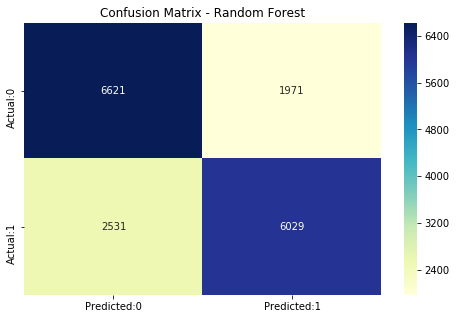

In [10]:
# Perform Confusion matrix on RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
figure1 = plt.figure(figsize = (8,5))
plt.title("Confusion Matrix - Random Forest")
figure1.savefig("Confusion_Matrix_RF.png")
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [22]:
# Calculate Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, prediction, target_names=target_names, output_dict = True)
df = pd.DataFrame(class_report).transpose()
df_to_html = df.to_html()
print(class_report)
print(df_to_html)

{'no-attack': {'precision': 0.7234484265734266, 'recall': 0.7706005586592178, 'f1-score': 0.7462804328223624, 'support': 8592}, 'attack': {'precision': 0.753625, 'recall': 0.704322429906542, 'f1-score': 0.7281400966183575, 'support': 8560}, 'accuracy': 0.7375233208955224, 'macro avg': {'precision': 0.7385367132867133, 'recall': 0.7374614942828799, 'f1-score': 0.73721026472036, 'support': 17152}, 'weighted avg': {'precision': 0.738508563498069, 'recall': 0.7375233208955224, 'f1-score': 0.7372271866757741, 'support': 17152}}
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>f1-score</th>
      <th>precision</th>
      <th>recall</th>
      <th>support</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>no-attack</th>
      <td>0.746280</td>
      <td>0.723448</td>
      <td>0.770601</td>
      <td>8592.000000</td>
    </tr>
    <tr>
      <th>attack</th>
      <td>0.728140</td>
      <td>0.753625</td>
      <td>0.704322</td>
 

In [12]:
# Discuss the accuracy and Sensitivity of the file
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'‘\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7375233208955224 
 The Missclassification = 1-Accuracy =  0.2624766791044776 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.704322429906542 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.7706005586592178 
 Positive Predictive value = TP/(TP+FP) =  0.753625 ‘
 Negative predictive Value = TN/(TN+FN) =  0.7234484265734266 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.0702883398056864 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.38369758076468674


In [14]:
# Find the best model
best_rf = rfgs.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

With 0.1 threshold the Confusion Matrix is  
 [[ 824 7768]
 [  99 8461]] 
 with 9285 correct predictions and 99 Type II errors( False Negatives) 

 Sensitivity:  0.9884345794392523 Specificity:  0.09590316573556797 



With 0.2 threshold the Confusion Matrix is  
 [[2399 6193]
 [ 455 8105]] 
 with 10504 correct predictions and 455 Type II errors( False Negatives) 

 Sensitivity:  0.9468457943925234 Specificity:  0.27921322160148976 



With 0.3 threshold the Confusion Matrix is  
 [[4131 4461]
 [1064 7496]] 
 with 11627 correct predictions and 1064 Type II errors( False Negatives) 

 Sensitivity:  0.8757009345794392 Specificity:  0.48079608938547486 



With 0.4 threshold the Confusion Matrix is  
 [[5546 3046]
 [1767 6793]] 
 with 12339 correct predictions and 1767 Type II errors( False Negatives) 

 Sensitivity:  0.7935747663551402 Specificity:  0.6454841713221602 





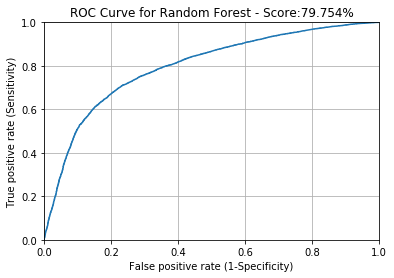

In [33]:
# ROC Curve
from sklearn.preprocessing import binarize

for i in range(1,5):
   cm2=0
   y_pred_prob_yes=best_rf.predict_proba(X_test)
   y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
   cm2=confusion_matrix(y_test,y_pred2)
   print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
           'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
         'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
AUROC_Score_RF = roc_auc_score(y_test,y_pred_prob_yes[:,1])
score_rf = "{0:.3%}".format(AUROC_Score_RF)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Random Forest - Score:' + str(score_rf))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.savefig("ROC_Curve_RF.png")

In [24]:
# Use pickle to have user inputs
import pickle

pkl_rf_filename = "pickle_rf.pkl"
with open(pkl_rf_filename, "wb") as file:
    pickle.dump(best_rf, file)
    
with open(pkl_rf_filename, "rb") as file:
    pickle_model_rf = pickle.load(file)
    
pickle_model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [25]:
# Test the model
import numpy as np

new_user_input = np.array([[61,62,205,130,80,37.49,1,0,0,0,1,1,0,0,1,0,1,0,0,1]])

best_rf_score = pickle_model_rf.score(X_test, y_test)
perc_score_rf = 100*best_rf_score
print("Test Score: {:.2f} %".format(perc_score_rf))
predict_rf = pickle_model_rf.predict(new_user_input)
predict_rf    


Test Score: 73.75 %


array([1], dtype=int64)